In [1]:
from sklearn.datasets import load_wine
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load Dataset

In [2]:
wine = load_wine()
X = pd.DataFrame(wine.data , columns = wine.feature_names) # created a DataFrame
Y = pd.Series(wine.target)  # created a series

# Explore the Dataset

In [3]:
# Shape of the data
print("Shape of features (X):", X.shape)
print("Shape of target (Y):", Y.shape)

Shape of features (X): (178, 13)
Shape of target (Y): (178,)


In [4]:
# Columns / features
print("\nFeature names:\n" , wine.feature_names) 


Feature names:
 ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [5]:
# First 5 rows
print("\nFirst 5 rows of data:\n")
print(X.head())


First 5 rows of data:

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proli

In [6]:
# Check for missing values
print("\nMissing values in data:\n")
print(X.isnull().sum())



Missing values in data:

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64


In [7]:
# Basic stats
print("\nStatistical Summary:\n")
print(X.describe())


Statistical Summary:

          alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.57

# Data Visualization

# Correlation HeatMap

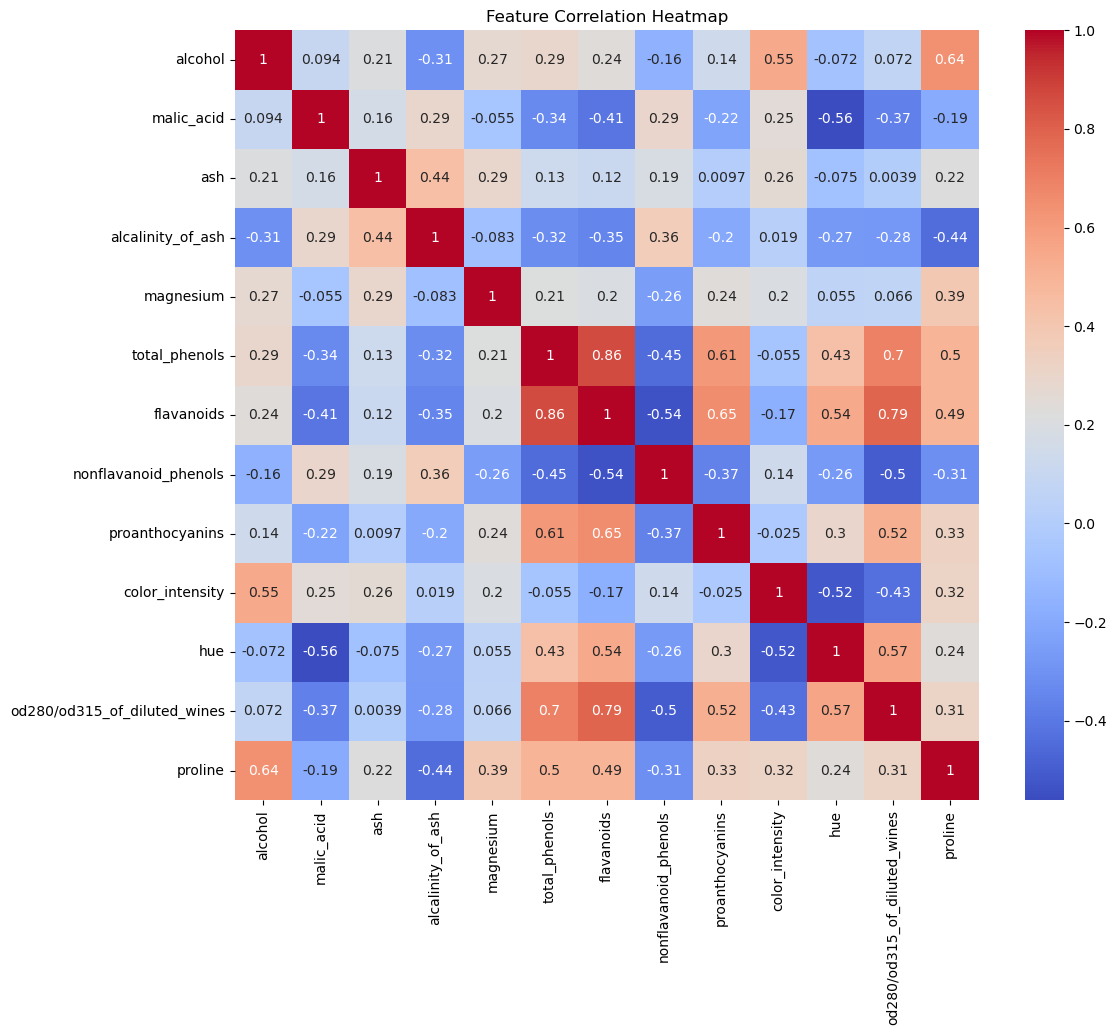

In [8]:
plt.figure(figsize=(12,10))
sns.heatmap(X.corr() , cmap = 'coolwarm' , annot = True)
plt.title('Feature Correlation Heatmap')
plt.show()


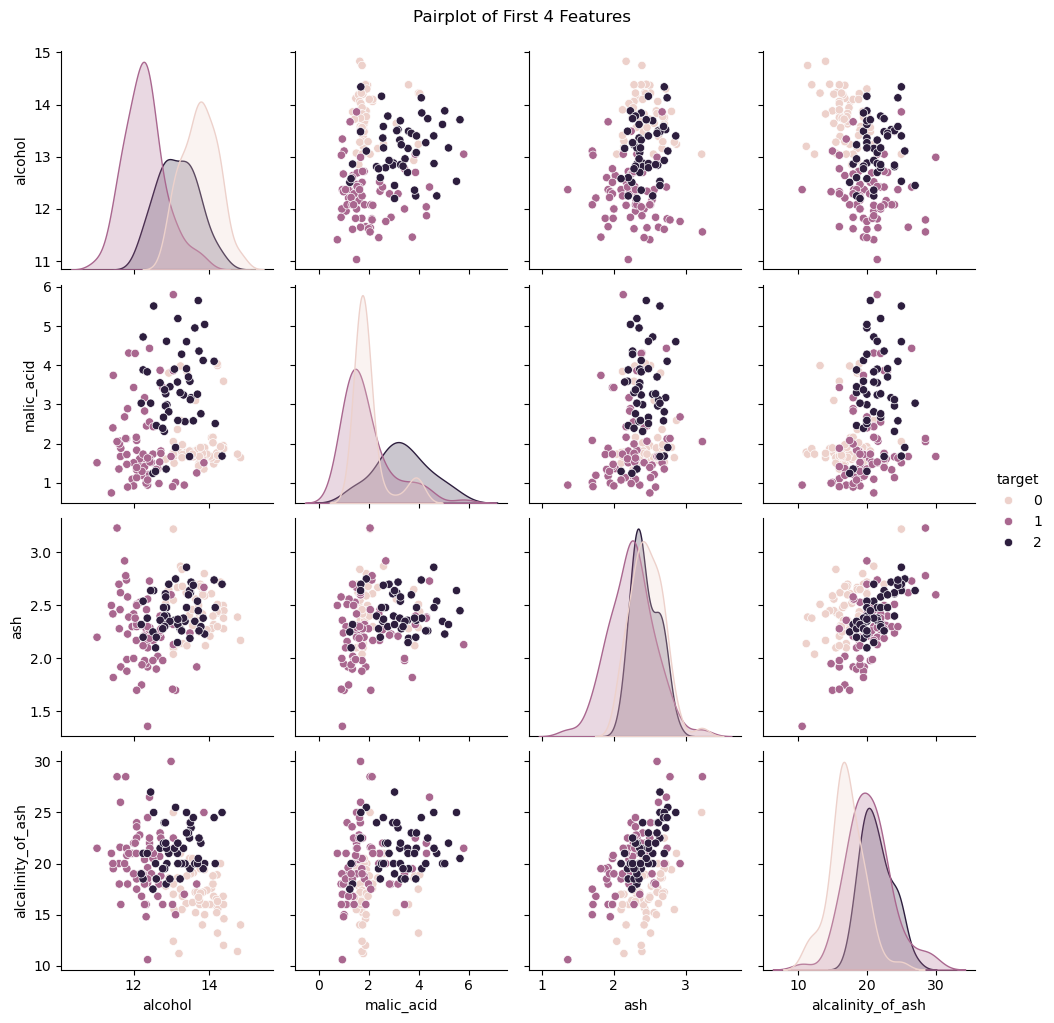

In [9]:
# Pairplot for first 4 features
sns.pairplot(pd.concat([X.iloc[:, :4], Y.rename('target')], axis=1), hue='target')
plt.suptitle('Pairplot of First 4 Features', y=1.02)
plt.show()

# Train-Test Split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (124, 13)
Testing set size: (54, 13)


# Model Building

In [11]:
# Model
knn = KNeighborsClassifier(n_neighbors=5) 

In [12]:
# Train the model
knn.fit(X_train , y_train)

KNeighborsClassifier()

In [13]:
y_pred = knn.predict(X_test)

# Model Evaluation

In [14]:
# Accuracy
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Accuracy Score: 0.7407407407407407


In [15]:
# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89        19
           1       0.75      0.71      0.73        21
           2       0.53      0.57      0.55        14

    accuracy                           0.74        54
   macro avg       0.73      0.73      0.73        54
weighted avg       0.74      0.74      0.74        54



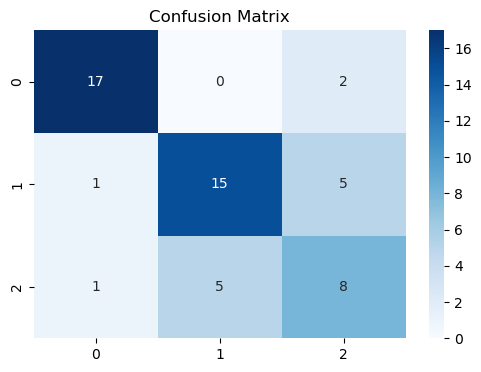

In [16]:
# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Finding best k

In [17]:
k_range = range(1,21)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors= k)
    knn.fit(X_train , y_train)
    scores.append(knn.score(X_test , y_test))
    


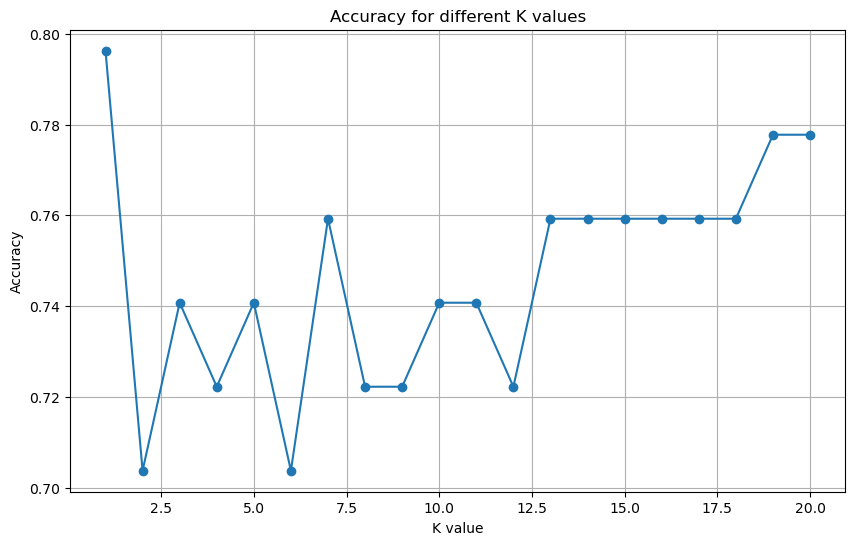

In [18]:
plt.figure(figsize=(10,6))
plt.plot(k_range, scores, marker='o')
plt.title('Accuracy for different K values')
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

# Observations